# Advection Equation - Lax-Friedrichs

I solve the advection equation $u_t + a u_x=0$ using as an initial condition a gaussian profile $u(x,t=0)=\exp{[-(x-x_0)^2]}$ with $x_0=5$.

I use a domain $x\in [0,10]$ with periodic boundary conditions.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
run_name = '_101points_0.5cf'

In [4]:
L = 10.0     
nx = 101    
dx = L/(nx-1)   
x = np.linspace(0, L, nx)

cf = 0.5       
dt = cf*dx
t_final = 20.0

x0=5
u_initial = np.exp(-(x-x0)**2)

u_current = u_initial.copy() 

l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time=[]
time.append(0.0) 

print('nx =',nx)
print('dx =',dx)
print('dt =',dt)
print('Number of iterations =',t_final/dt)

nx = 101
dx = 0.1
dt = 0.05
Number of iterations = 400.0


In [5]:
os.makedirs('./images_LAXFRIED' + str(run_name))
os.listdir('./')

['.ipynb_checkpoints',
 'Exercise 1 - Advection Equation - FTCS.ipynb',
 'Exercise 1 - Advection Equation - LAX-FRIEDRICHS.ipynb',
 'Exercise 1 - Advection Equation - LAXWENDROFF.ipynb',
 'Exercise 1 - Advection Equation - LEAPFROG.ipynb',
 'images_FTCS_101points_0.5cf',
 'images_LAXFRIED_101points_0.5cf',
 'init_final_stepFTCS_101points_0.5cf.png',
 'l2norm_FTCS_101points_0.5cf.txt',
 'Plot the l2 norm vs time.ipynb',
 'time_FTCS_101points_0.5cf.txt']

In [6]:
t = 0.0
i = 0

plt.plot(x, u_current)
plt.title('Time='+str(round(t,2)))
plt.ylim(0,1.1)
plt.savefig('./images_LAXFRIED' + str(run_name) + '/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

while t < t_final:
    
    u_next = 1/2*(np.roll(u_current, 1) + np.roll(u_current, -1))- dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))
    u_current = u_next.copy()
    
    t += dt
    i += 1
    
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)

    if (i%10==0):
        plt.plot(x, u_current)
        plt.title('Time='+str(round(t,2)))
        plt.ylim(0,1.1)
        plt.savefig('./images_LAXFRIED' + str(run_name) + '/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()

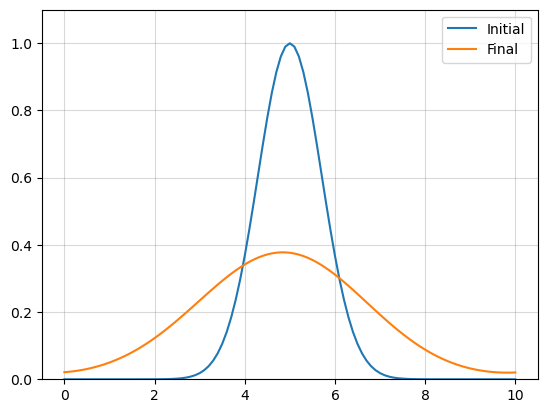

In [7]:
plt.plot(x, u_initial, label='Initial')
plt.plot(x, u_current, label='Final')
plt.ylim(0,1.1)
plt.legend()
plt.grid (c='gray', alpha = 0.3)
plt.savefig('init_final_stepLAXFRIED' + str(run_name) + '.png', dpi=200)

In [8]:
np.savetxt('l2norm_LAXFRIED' + str(run_name) + '.txt', l2norm)
np.savetxt('time_LAXFRIED' + str(run_name) + '.txt', time)